In [8]:
import numpy as np
import matplotlib.pyplot as plt
import shap
import warnings
import lightgbm as lgb
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
X, y = shap.datasets.boston()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_test = X_test.reset_index(drop=True)

In [4]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [5]:
lgbm_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': -1,
}
model = lgb.train(lgbm_params,
                    lgb_train,
                    valid_sets=lgb_val,
                    num_boost_round=1000,
                    early_stopping_rounds=100,
                    verbose_eval=50,
                    )

Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 4.6463
[100]	valid_0's rmse: 4.59973
[150]	valid_0's rmse: 4.57109
[200]	valid_0's rmse: 4.50173
[250]	valid_0's rmse: 4.48268
[300]	valid_0's rmse: 4.46613
[350]	valid_0's rmse: 4.46596
Early stopping, best iteration is:
[296]	valid_0's rmse: 4.461


### How to use SHAP

In [6]:
shap.initjs()
# shapのインスタンス作成(testデータを入れるとなぜかのちのコードでエラーが出る)
explainer = shap.TreeExplainer(model)

# shap値の計算
shap_values = explainer.shap_values(X_test)

### マクロの可視化

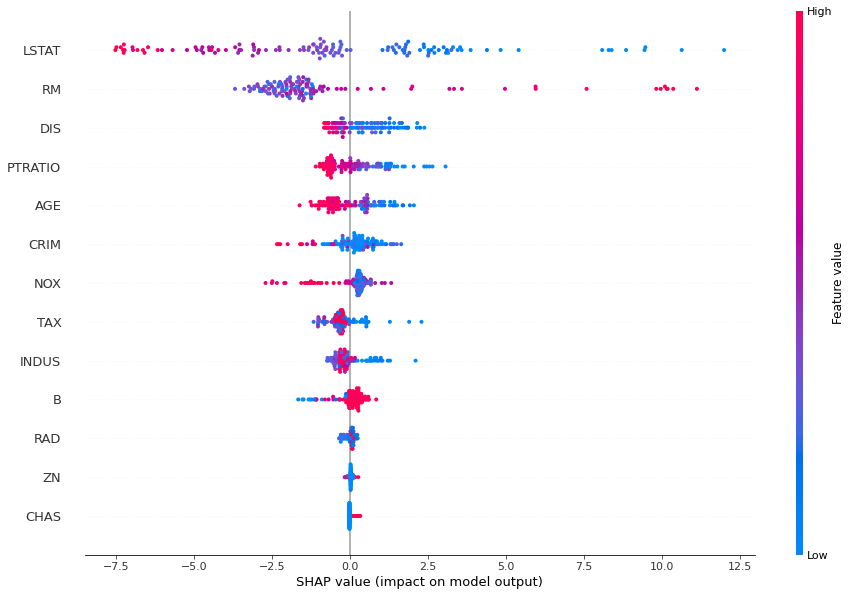

In [9]:
fig = plt.gcf()
shap.summary_plot(shap_values, X_test, show=False)
fig.set_size_inches(15, 10, forward=True)
# fig.savefig("shap.png")

### マクロの可視化

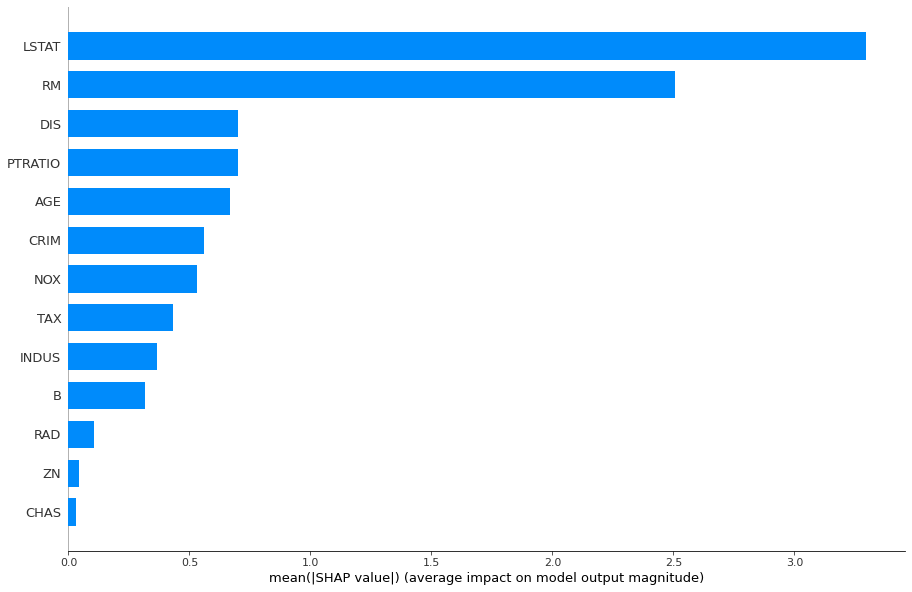

In [10]:
fig = plt.gcf()
shap.summary_plot(shap_values, X_test, show=False, plot_type='bar')
fig.set_size_inches(15, 10, forward=True)
# fig.savefig("shap.png")

### ミクロの可視化

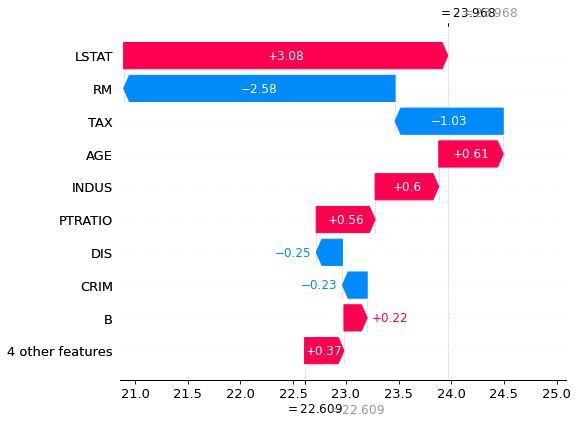

In [11]:
fig = plt.gcf()
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=X_test.columns)
fig.set_size_inches(15, 10, forward=True)
fig.savefig("shap.png")

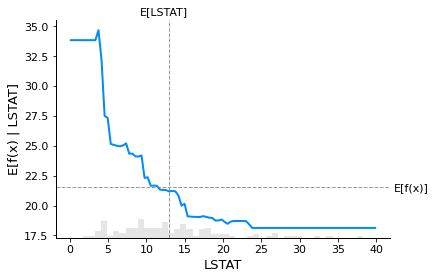

In [12]:
shap.plots.partial_dependence("LSTAT", model.predict, X_test, ice=False, model_expected_value=True, feature_expected_value=True)

Permutation explainer: 128it [00:13,  2.78it/s]                         


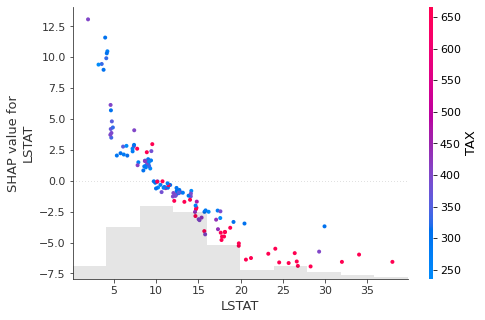

In [13]:
shap.initjs()

explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

shap.plots.scatter(shap_values[:,"LSTAT"], color=shap_values)

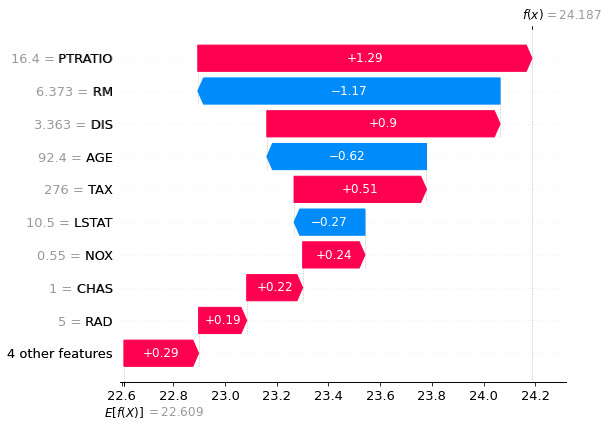

In [14]:
shap.initjs()

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[2])

In [15]:
# jupyter notebookにコードを表示させるためにjsをロード
shap.initjs()

#TreeExplainer でモデルと学習に使ったデータを渡してオブジェクトを作る。
explainer = shap.TreeExplainer(model=model,
                                feature_perturbation='tree_path_dependent',
                                model_output='margin')

#shap_valuesにshap_valueを格納する。
#shap._explanation.Explanation」で持つか、array型で持つか2パターンある
shap_values = explainer.shap_values(X_test) # numpy.ndarray型の場合
shap_values_ex = explainer(X_test) # shap._explanation.Explanation型の場合

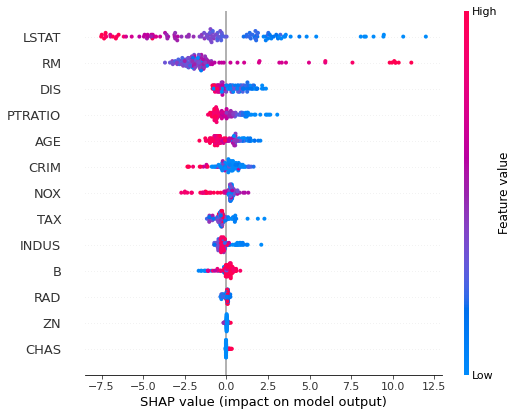

In [21]:
fig = plt.gcf()
shap.summary_plot(shap_values, X_test, show=True)
fig.set_size_inches(15, 10, forward=True)
fig.savefig("shap.png")
plt.close()

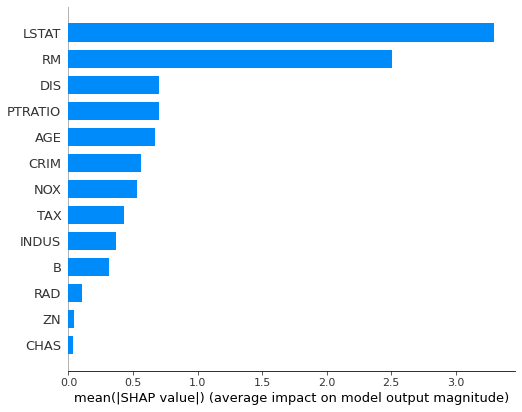

In [22]:
fig = plt.gcf()
shap.summary_plot(shap_values, X_test, plot_type="bar")
fig.set_size_inches(15, 10, forward=True)
fig.savefig('bar.png')
plt.close()

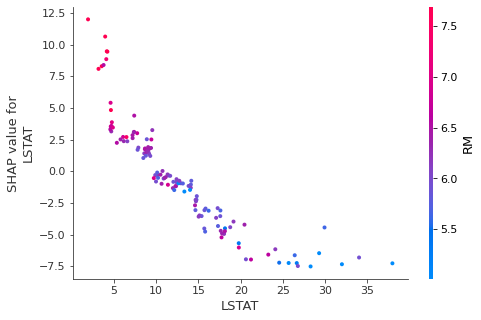

In [37]:
shap.dependence_plot(ind="LSTAT",
                        interaction_index='RM',
                        shap_values=shap_values,
                        features=X_test,
                        show=False)

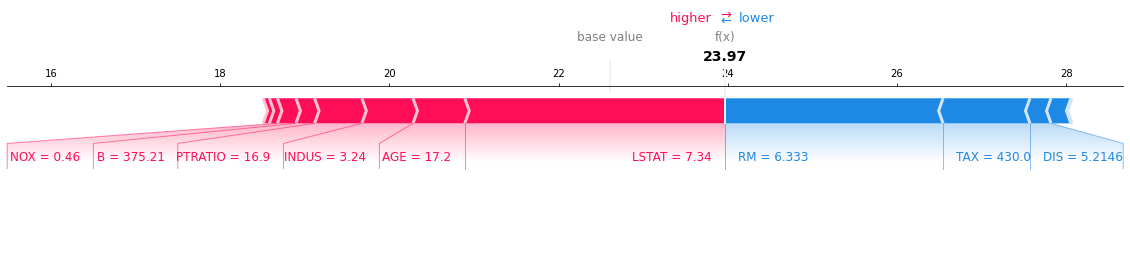

In [34]:
#index : 何番目のサンプルの情報をplotするか指定
index = 0
shap.force_plot(base_value=explainer.expected_value,
                shap_values=shap_values[index],
                features=X_test.iloc[index,:],
                show=False,
                matplotlib=True
                ).savefig('test.png')

In [40]:
shap.force_plot(base_value=explainer.expected_value,
                shap_values=shap_values,
                features=X_test, show=False)

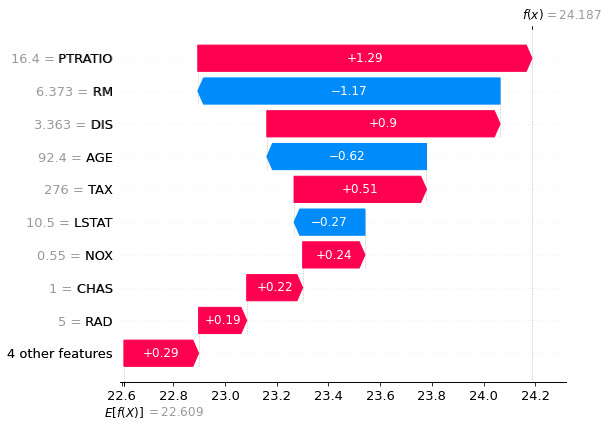

In [26]:
fig = plt.gcf()

index = 2 #表示するサンプルのインデックスを指定
shap.waterfall_plot(shap_values_ex[index])

fig.set_size_inches(15, 10, forward=True)
fig.savefig('dependence.png')
plt.close()

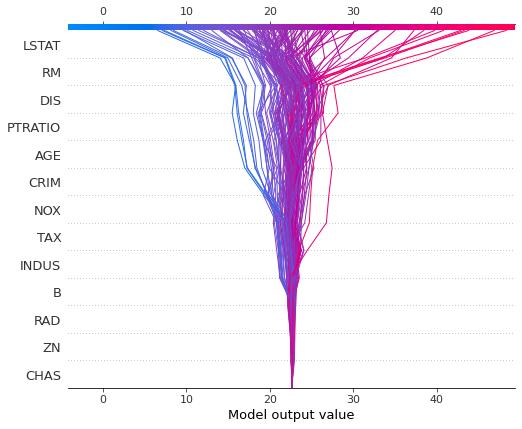

In [56]:
shap.decision_plot(base_value=explainer.expected_value,
                    shap_values=shap_values,
                    features=X_test,
                    feature_names=X_test.columns.tolist())